### Importing libraries

In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')



### Reading and Understanding te data 

In [2]:

day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### From  here we can conclude :-
- That there is no null data in the given dataset



In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Understanding  the data 

In [6]:
# Checking the columns of the given dataset

columns = day.columns
columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Dropping un-necessary columns

In [7]:
day = day.drop(['instant','dteday','casual','registered'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# Checking the data type of the given data 
day.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [9]:
## From here we can see that Season, Months , Weekdays and Weathersit
## are categorical data but their data type are given Int type so
## Converting int data type to object as it will affect the prediction 

In [10]:
day.season = day.season.astype(str)
day.mnth = day.mnth.astype(str)
day.weekday = day.weekday.astype(str)
day.weathersit = day.weathersit.astype(str)

In [11]:
day.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [12]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
day.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [14]:
day.mnth.value_counts()

8     62
1     62
10    62
12    62
5     62
7     62
3     62
9     60
4     60
6     60
11    60
2     56
Name: mnth, dtype: int64

In [15]:
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
day.weekday.value_counts()

1    105
2    105
4    104
0    104
6    104
5    104
3    104
Name: weekday, dtype: int64

In [17]:
day.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [18]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
day.temp.value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

In [20]:
day.atemp.value_counts()

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64

In [21]:
day.hum.value_counts()

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

In [22]:
day.windspeed.value_counts()

7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200    1
9.750175     1
Name: windspeed, Length: 649, dtype: int64

In [23]:
day.cnt.value_counts()

5119    2
4274    2
3784    2
6883    2
2077    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 695, dtype: int64

#### From here we can conclude that 
- Season , Month , Weekday and Weathersit are categorical variable data type
- temp, atemp, hum, windspeed are contineous variable type
- holiday, yr, working day are binary variable data type
- cnt is the target variable

### Visualising the numerica data type

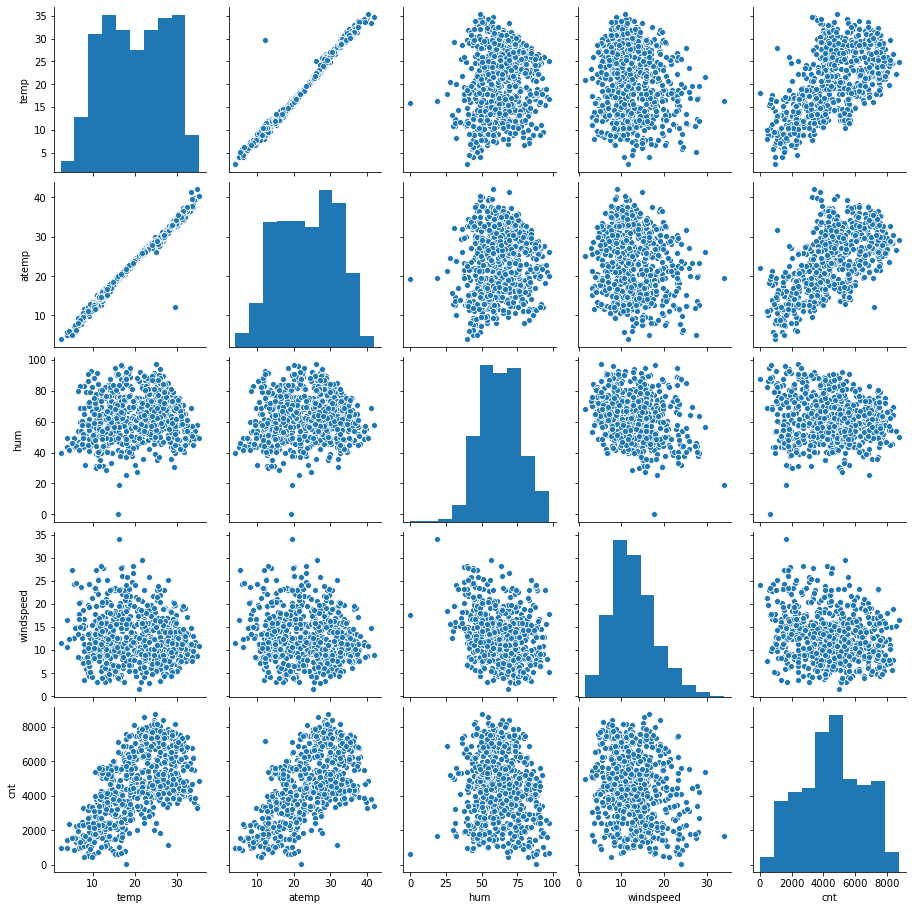

In [24]:
num_var = day[['temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_var);

In [25]:
# Checking the corealation of the data 
day.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [26]:
# Creating heatmap to check the corelation

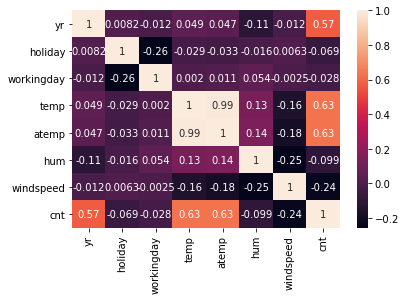

In [27]:
sns.heatmap(day.corr(),annot = True);


### From here we can comclude that :- 
- temp, atemp, yr are highly corelated to cnt
- linear regression can be considered as their are variable which has linear relationship 
- dropping atemp as the corealtion between temp and atemp is very high 

In [28]:
day = day.drop('atemp',axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [29]:
# visualising categorical variables

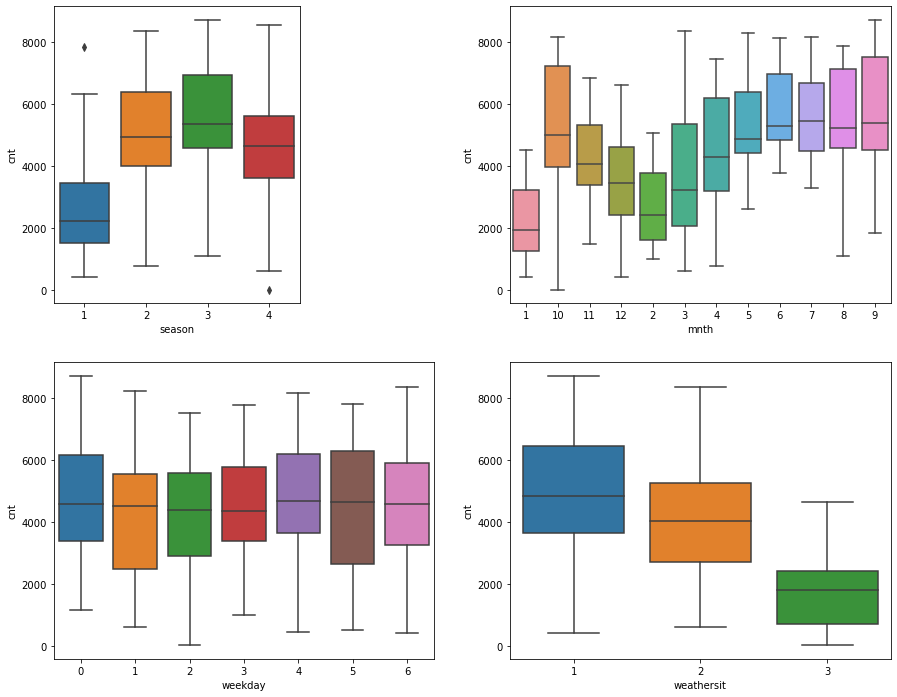

In [30]:
plt.figure(figsize=(15, 12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y ='cnt', data =day)
plt.subplot(2,2,2)
sns.boxplot(x='mnth', y='cnt', data =day)
plt.subplot(2,2,3)
sns.boxplot(x ='weekday', y='cnt', data =day)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y='cnt', data =day)
plt.show()

### From here we can conclude that 
- More bikes are rented in season 3  which is fall season 
- Most bikes are rented in 9 and 10 month which is September and October month
- Most bikes are rented in 1 weater which is clear_partly_cloudy weather

In [31]:
# visualising binary variables

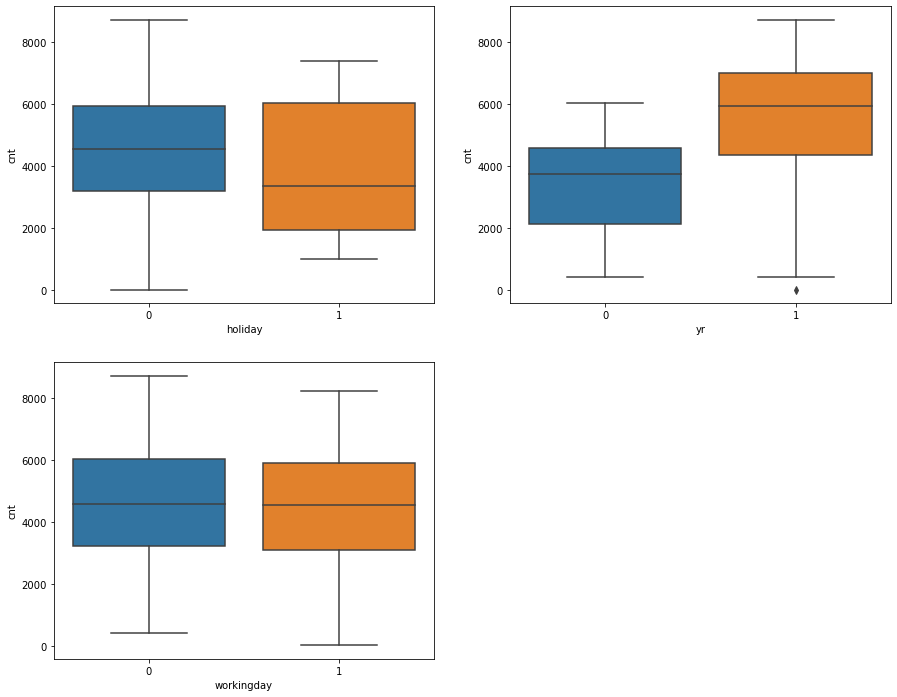

In [32]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'holiday', y='cnt', data =day)
plt.subplot(2,2,2)
sns.boxplot(x = 'yr', y='cnt', data =day)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y='cnt', data =day)
plt.show()

### From here we can conclude that 
- Most bikes are rented at 1 which is holiday
- Numbers of bike rental has increased in year 2019 which is represented as 1


## Data preparation for modeling

In [33]:
# mapping the season variable with proper information 
def map_func(x):
    return x.map({'1':'Sn_spring','2':'Sn_summer','3':'Sn_fall','4':'Sn_winter'})

day['season'] = day[['season']].apply(map_func)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Sn_spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,Sn_spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,Sn_spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,Sn_spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,Sn_spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [34]:
day.season.value_counts()

Sn_fall      188
Sn_summer    184
Sn_spring    180
Sn_winter    178
Name: season, dtype: int64

In [35]:
# Creating a dummy variable for season column and storing the values in new variable name season_dummy

In [36]:
season_dummy = pd.get_dummies(day['season'],drop_first=True)
season_dummy.head()

,Sn_spring,Sn_summer,Sn_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [37]:
# Concating the season_dummy df to the day dataframne

In [38]:
day=pd.concat([day,season_dummy],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,Sn_winter
0,Sn_spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0
1,Sn_spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,1,0,0
2,Sn_spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,Sn_spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,Sn_spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [39]:
# dropping the season column
day = day.drop('season', axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,Sn_winter
0,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [40]:
# Creating dummy variable for mnth column

def mnth_map(x):
    return x.map({'1':'jan','2':'feb','3':'march',
                  '4':'april','5':'may','6':'june','7':'july',
                  '8':'august','9':'sept','10':'oct',
                  '11':'nov','12':'dec'})

day['mnth'] = day[['mnth']].apply(mnth_map)

In [41]:
day.mnth.value_counts()

july      62
march     62
oct       62
may       62
jan       62
dec       62
august    62
june      60
sept      60
nov       60
april     60
feb       56
Name: mnth, dtype: int64

In [42]:
# Creating a dummy variable for mnth column and storing the values in new variable name mnth_dummy
mnth_dummy = pd.get_dummies(day['mnth'],drop_first=True)
mnth_dummy.head()

,august,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [43]:
# Concating the mnth_dummy df to the day dataframne
day = pd.concat([day,mnth_dummy],axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,jan,0,1,1,2,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,2,1,2,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,3,1,1,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,4,1,1,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,5,1,1,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# dropping the mnth column
day = day.drop('mnth',axis=1)
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Sn_spring,...,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,1,1,2,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# Creating dummy variable for weekday column
def map_weekday(x):
    return x.map({'0':'sun','1':'mon',
                  '2':'tue','3':'wed',
                  '4':'thurs','5':'fri',
                  '6':'sat'})

day['weekday'] = day[['weekday']].apply(map_weekday)

In [46]:
day.weekday.value_counts()

tue      105
mon      105
fri      104
sat      104
thurs    104
wed      104
sun      104
Name: weekday, dtype: int64

In [47]:
# Creating a dummy variable for weekday column and storing the values in new variable name weekday_dummy

weekday_dummy = pd.get_dummies(day['weekday'], drop_first = True)
weekday_dummy.head()

,mon,sat,sun,thurs,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [48]:
# Concating the weekday_dummy df to the day dataframne

day = pd.concat([day,weekday_dummy],axis=1)
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Sn_spring,...,may,nov,oct,sept,mon,sat,sun,thurs,tue,wed
0,0,0,mon,1,2,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,tue,1,2,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,wed,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,thurs,1,1,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,fri,1,1,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# dropping the mnth column from day dataframe

day = day.drop('weekday',axis=1)
day.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,...,may,nov,oct,sept,mon,sat,sun,thurs,tue,wed
0,0,0,1,2,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [51]:
# Creating dummy variable for weathersit column and storing the values in weathers_dummy column
def map_weathers(x):
    return x.map({'1':'clear_partly_cloudy','2':'mist_cloudy','3':'light_snow_rain',})

day['weathersit'] = day[['weathersit']].apply(map_weathers)

In [52]:
day.weathersit.value_counts()

clear_partly_cloudy    463
mist_cloudy            246
light_snow_rain         21
Name: weathersit, dtype: int64

In [53]:
weathers_dummy=pd.get_dummies(day['weathersit'],drop_first=True)

weathers_dummy.head()

,light_snow_rain,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [54]:
# Concating the weathers_dummy df to the day dataframne
day = pd.concat([day,weathers_dummy],axis=1)
day.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,...,oct,sept,mon,sat,sun,thurs,tue,wed,light_snow_rain,mist_cloudy
0,0,0,1,mist_cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,mist_cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,clear_partly_cloudy,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,clear_partly_cloudy,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,clear_partly_cloudy,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Dropping the weathersit column
day = day.drop('weathersit',axis=1)
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,Sn_winter,...,oct,sept,mon,sat,sun,thurs,tue,wed,light_snow_rain,mist_cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
day.shape

(730, 29)

In [57]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   Sn_spring        730 non-null    uint8  
 8   Sn_summer        730 non-null    uint8  
 9   Sn_winter        730 non-null    uint8  
 10  august           730 non-null    uint8  
 11  dec              730 non-null    uint8  
 12  feb              730 non-null    uint8  
 13  jan              730 non-null    uint8  
 14  july             730 non-null    uint8  
 15  june             730 non-null    uint8  
 16  march            730 non-null    uint8  
 17  may             

### Splitting the data into training and testing 

In [58]:
# splitting the data into day_train and day_test 

day_train, day_test = train_test_split(day, train_size=0.7,random_state=100)
print(day_train.shape)
print(day_test.shape)

(510, 29)
(220, 29)


In [59]:
# checking the info of the train and test data
day_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   cnt              510 non-null    int64  
 7   Sn_spring        510 non-null    uint8  
 8   Sn_summer        510 non-null    uint8  
 9   Sn_winter        510 non-null    uint8  
 10  august           510 non-null    uint8  
 11  dec              510 non-null    uint8  
 12  feb              510 non-null    uint8  
 13  jan              510 non-null    uint8  
 14  july             510 non-null    uint8  
 15  june             510 non-null    uint8  
 16  march            510 non-null    uint8  
 17  may           

In [60]:
day_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               220 non-null    int64  
 1   holiday          220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   hum              220 non-null    float64
 5   windspeed        220 non-null    float64
 6   cnt              220 non-null    int64  
 7   Sn_spring        220 non-null    uint8  
 8   Sn_summer        220 non-null    uint8  
 9   Sn_winter        220 non-null    uint8  
 10  august           220 non-null    uint8  
 11  dec              220 non-null    uint8  
 12  feb              220 non-null    uint8  
 13  jan              220 non-null    uint8  
 14  july             220 non-null    uint8  
 15  june             220 non-null    uint8  
 16  march            220 non-null    uint8  
 17  may           

### Rescaling the numeric variables

In [61]:
scaler = MinMaxScaler()

num_var = ['temp','hum','windspeed','cnt']

# fitting on data

day_train[num_var]=scaler.fit_transform(day_train[num_var])
day_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,Sn_winter,...,oct,sept,mon,sat,sun,thurs,tue,wed,light_snow_rain,mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,Sn_winter,...,oct,sept,mon,sat,sun,thurs,tue,wed,light_snow_rain,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


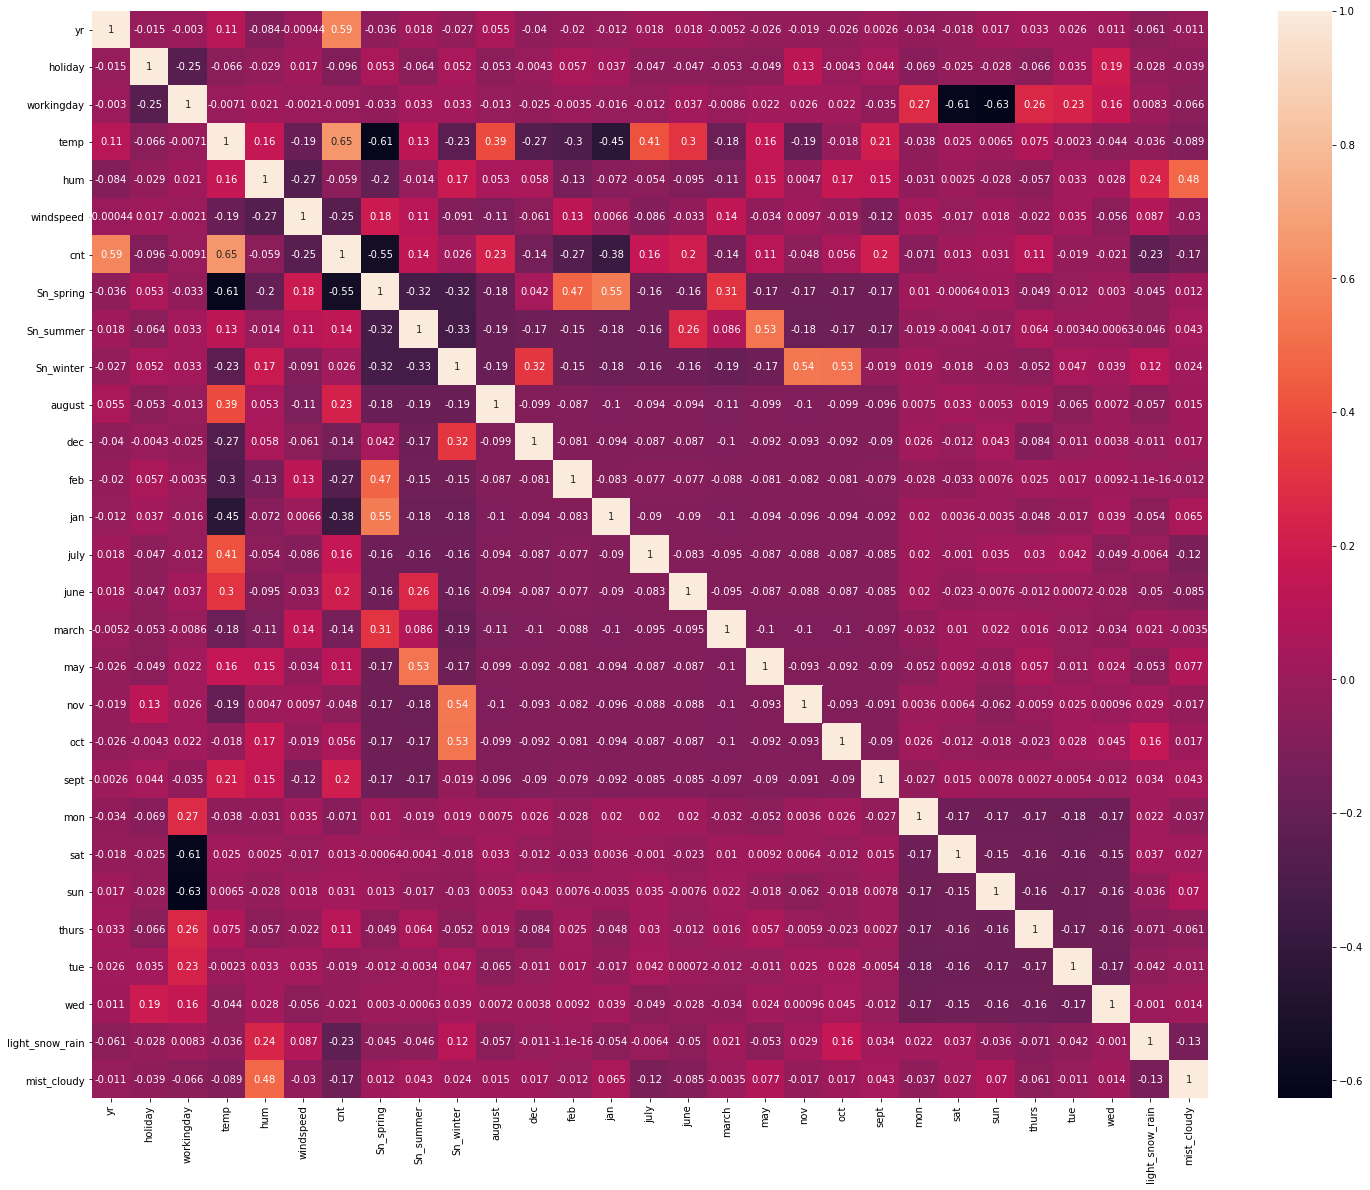

In [63]:
# Lets check the corelation coefficient to know which variable is highly correlated with each other
plt.figure(figsize = (25, 20))
sns.heatmap(day_train.corr(), annot = True);


### From here we can conclude that 
- yr and temp are highly corelated to cnt

# Creating X_train  and y_train

In [64]:
X_train=day_train
y_train=day_train.pop('cnt')


In [65]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Sn_spring,Sn_summer,Sn_winter,august,...,oct,sept,mon,sat,sun,thurs,tue,wed,light_snow_rain,mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [66]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Data Modeling 

In [67]:
# Using RFE(Recursive feature elimination) with the output number of variables equal to 20

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,18)
rfe = rfe.fit(X_train,y_train)

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Sn_spring', True, 1),
 ('Sn_summer', True, 1),
 ('Sn_winter', True, 1),
 ('august', False, 6),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 8),
 ('march', False, 11),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 9),
 ('sept', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', False, 2),
 ('thurs', False, 10),
 ('tue', False, 3),
 ('wed', False, 7),
 ('light_snow_rain', True, 1),
 ('mist_cloudy', True, 1)]

In [69]:
# columns use in  model according to RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Sn_spring',
       'Sn_summer', 'Sn_winter', 'dec', 'feb', 'jan', 'july', 'nov', 'sept',
       'sat', 'light_snow_rain', 'mist_cloudy'],
      dtype='object')

In [70]:
# variables which can be excluded to make models using RFE
X_train.columns[~rfe.support_]

Index(['august', 'june', 'march', 'may', 'oct', 'mon', 'sun', 'thurs', 'tue',
       'wed'],
      dtype='object')

In [71]:
X_train[col].shape

(510, 18)

### Building model using statsmodel, for the detailed statistics

In [72]:
# Creating an X_train dataframe to build the first model
X_train_sm1 = X_train[col]

# Adding constant
X_train_sm1 =sm.add_constant(X_train_sm1)
X_train_sm1.head()


,const,yr,holiday,workingday,temp,hum,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,feb,jan,july,nov,sept,sat,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,1
111,1.0,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,1


In [73]:
# Building a model

lm_1 = sm.OLS(y_train, X_train_sm1)

lm_1_model = lm_1.fit()

print(lm_1_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          5.13e-187
Time:                        18:24:35   Log-Likelihood:                 517.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     491   BIC:                            -917.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3464      0.038     

In [74]:
X_train_sm1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Sn_spring', 'Sn_summer', 'Sn_winter', 'dec', 'feb', 'jan', 'july',
       'nov', 'sept', 'sat', 'light_snow_rain', 'mist_cloudy'],
      dtype='object')

### Here we can see that R2 is 0.847 which is good but there are few variables with high p value


In [75]:
# Calculating the VIF to drop few columns 

In [76]:
X_train_sm1 = X_train_sm1.drop('const',axis=1)

In [77]:
# calculate the VIF for model 1
vif =pd.DataFrame()
X = X_train_sm1
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
4,hum,32.72
3,temp,19.14
2,workingday,5.98
6,Sn_spring,5.59
5,windspeed,4.78
8,Sn_winter,4.14
7,Sn_summer,2.89
11,jan,2.39
17,mist_cloudy,2.38
0,yr,2.09


### Here the p value of feb month seems to be insignificanat

-dropping the column Feb and rebuliding the model


## Model 2

In [78]:
X_train_sm2= X_train_sm1.drop(['feb'], axis = 1)
X_train_sm2.head()

,yr,holiday,workingday,temp,hum,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,sat,light_snow_rain,mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,1


In [79]:
# Adding constant
X_train_sm2 =sm.add_constant(X_train_sm2)
X_train_sm2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,sat,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1
111,1.0,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,1


In [80]:
 # Running the linear model
lm2 = sm.OLS(y_train,X_train_sm2)

In [81]:
lm2_model = lm2.fit()


print(lm2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          1.45e-187
Time:                        18:24:36   Log-Likelihood:                 516.59
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     492   BIC:                            -921.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3349      0.037     

In [82]:
X_train_sm2 = X_train_sm2.drop('const',axis=1)

In [83]:
# calculate the VIF for model 2
vif =pd.DataFrame()
X = X_train_sm2
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
4,hum,32.17
3,temp,18.56
2,workingday,5.97
5,windspeed,4.77
6,Sn_spring,4.54
8,Sn_winter,4.14
7,Sn_summer,2.89
16,mist_cloudy,2.37
0,yr,2.09
12,nov,1.87


## Here p value of sat column seems to be insignificent
- dropping the couln and building the model again

# Model 3

In [84]:
X_train_sm3= X_train_sm2.drop(['sat'], axis = 1)
X_train_sm3.head()

,yr,holiday,workingday,temp,hum,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,light_snow_rain,mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [85]:
# Adding constant
X_train_sm3 =sm.add_constant(X_train_sm3)
X_train_sm3.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [86]:
 # Running the linear model
lm3 = sm.OLS(y_train,X_train_sm3)

# Filtting the model
lm3_model = lm3.fit()

#printing out the summary 

print(lm3_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          1.19e-188
Time:                        18:24:36   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3321      0.036     

In [87]:
X_train_sm3 = X_train_sm3.drop('const',axis=1)

In [88]:
# calculate the VIF for model 3
vif =pd.DataFrame()
X = X_train_sm3
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
4,hum,31.85
3,temp,17.92
5,windspeed,4.76
6,Sn_spring,4.42
8,Sn_winter,4.10
2,workingday,3.69
7,Sn_summer,2.85
15,mist_cloudy,2.37
0,yr,2.09
12,nov,1.85


###  Here we can see that the VIF of hum column is very high 
- therefore we are dropping the column

### Model 4

In [89]:
X_train_sm4= X_train_sm3.drop(['hum'], axis = 1)
X_train_sm4.head()

,yr,holiday,workingday,temp,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,light_snow_rain,mist_cloudy
576,1,0,1,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1


In [90]:
# Adding constant
X_train_sm4 =sm.add_constant(X_train_sm4)
X_train_sm4.head()

,const,yr,holiday,workingday,temp,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1


In [91]:
 # Running the linear model
lm4 = sm.OLS(y_train,X_train_sm4)

# Filtting the model
lm4_model = lm4.fit()

#printing out the summary 

print(lm4_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          3.69e-186
Time:                        18:24:36   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2627      0.033     

In [92]:
X_train_sm4 = X_train_sm4.drop('const',axis=1)

In [93]:
# calculate the VIF for model 4
vif =pd.DataFrame()
X = X_train_sm4
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
3,temp,6.11
4,windspeed,4.69
2,workingday,3.58
5,Sn_spring,3.08
7,Sn_winter,3.08
6,Sn_summer,2.33
0,yr,2.07
11,nov,1.82
9,jan,1.66
10,july,1.59


## Here we can see that the VIF of temp colum is pretty high 

- therefore we are dropping that column 

## Model 5

In [94]:
X_train_sm5= X_train_sm4.drop(['temp'], axis = 1)
X_train_sm5.head()

,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,light_snow_rain,mist_cloudy
576,1,0,1,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,1,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0,0.380981,0,1,0,0,0,0,0,0,0,1


In [95]:
# Adding constant
X_train_sm5 =sm.add_constant(X_train_sm5)
X_train_sm5.head()

,const,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,july,nov,sept,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0,0.380981,0,1,0,0,0,0,0,0,0,1


In [96]:
# Running the linear model
lm5 = sm.OLS(y_train,X_train_sm5)

# Filtting the model
lm5_model = lm5.fit()

#printing out the summary 

print(lm5_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.1
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          1.68e-159
Time:                        18:24:36   Log-Likelihood:                 441.53
No. Observations:                 510   AIC:                            -853.1
Df Residuals:                     495   BIC:                            -789.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6132      0.018     

In [97]:
X_train_sm5 = X_train_sm5.drop('const',axis=1)

In [98]:
# calculate the VIF for model 5
vif =pd.DataFrame()
X = X_train_sm5
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,4.11
6,Sn_winter,3.06
4,Sn_spring,3.04
2,workingday,3.03
5,Sn_summer,2.23
0,yr,1.87
10,nov,1.81
8,jan,1.64
13,mist_cloudy,1.53
7,dec,1.46


## Here again we can see that the pvalue of month july is very high
- therefore we are dorpping the column and building the model again


## Model 6

In [99]:
X_train_sm6= X_train_sm5.drop(['july'], axis = 1)
X_train_sm6.head()

,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,nov,sept,light_snow_rain,mist_cloudy
576,1,0,1,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,1,0.663106,1,0,0,1,0,0,0,0,0
482,1,0,0,0.188475,0,1,0,0,0,0,0,0,1
111,0,0,0,0.380981,0,1,0,0,0,0,0,0,1


In [100]:
# Adding constant
X_train_sm6 =sm.add_constant(X_train_sm6)
X_train_sm6.head()

,const,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,Sn_winter,dec,jan,nov,sept,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.663106,1,0,0,1,0,0,0,0,0
482,1.0,1,0,0,0.188475,0,1,0,0,0,0,0,0,1
111,1.0,0,0,0,0.380981,0,1,0,0,0,0,0,0,1


In [101]:
# Running the linear model
lm6 = sm.OLS(y_train,X_train_sm6)

# Filtting the model
lm6_model = lm6.fit()

#printing out the summary 

print(lm6_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          2.05e-160
Time:                        18:24:36   Log-Likelihood:                 441.10
No. Observations:                 510   AIC:                            -854.2
Df Residuals:                     496   BIC:                            -794.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6061      0.016     

In [102]:
X_train_sm6 = X_train_sm6.drop('const',axis=1)

In [103]:
# calculate the VIF for model 6
vif =pd.DataFrame()
X = X_train_sm6
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,3.88
6,Sn_winter,2.89
2,workingday,2.87
4,Sn_spring,2.79
5,Sn_summer,1.99
0,yr,1.83
9,nov,1.80
8,jan,1.64
12,mist_cloudy,1.52
7,dec,1.46


### Here we can see that the p-value of season winter column is insignificant
- therefore we are dropping this column

In [104]:
X_train_sm7= X_train_sm6.drop(['Sn_winter'], axis = 1)
X_train_sm7.head()

,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,dec,jan,nov,sept,light_snow_rain,mist_cloudy
576,1,0,1,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.255342,1,0,0,0,0,0,0,1
728,1,0,1,0.663106,1,0,1,0,0,0,0,0
482,1,0,0,0.188475,0,1,0,0,0,0,0,1
111,0,0,0,0.380981,0,1,0,0,0,0,0,1


In [105]:
# Adding constant
X_train_sm7 =sm.add_constant(X_train_sm7)
X_train_sm7.head()

,const,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,dec,jan,nov,sept,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,1,0.663106,1,0,1,0,0,0,0,0
482,1.0,1,0,0,0.188475,0,1,0,0,0,0,0,1
111,1.0,0,0,0,0.380981,0,1,0,0,0,0,0,1


In [106]:
# Running the linear model
lm7 = sm.OLS(y_train,X_train_sm7)

# Filtting the model
lm7_model = lm7.fit()

#printing out the summary 

print(lm7_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          2.50e-161
Time:                        18:24:37   Log-Likelihood:                 440.64
No. Observations:                 510   AIC:                            -855.3
Df Residuals:                     497   BIC:                            -800.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6018      0.015     

In [107]:
X_train_sm7 = X_train_sm7.drop('const',axis=1)

In [108]:
# calculate the VIF for model 6
vif =pd.DataFrame()
X = X_train_sm7
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,3.72
2,workingday,2.73
4,Sn_spring,2.39
0,yr,1.82
5,Sn_summer,1.77
7,jan,1.63
11,mist_cloudy,1.48
8,nov,1.28
9,sept,1.19
6,dec,1.15


## This model satisfies our requirements
-The VIFs and p-values both are within an acceptable range.

-So we go ahead and make our predictions using this model only

-r square is 0.793

-The p values of the columns are below 0.05

-The VIF values of the coulmns are below 5 except the constant variable

## Residual analysis

In [109]:
X_train_sm7.shape

(510, 12)

In [110]:
# Adding constant
X_train_sm7 =sm.add_constant(X_train_sm7)
X_train_sm7.head()

,const,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,dec,jan,nov,sept,light_snow_rain,mist_cloudy
576,1.0,1,0,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,1,0.663106,1,0,1,0,0,0,0,0
482,1.0,1,0,0,0.188475,0,1,0,0,0,0,0,1
111,1.0,0,0,0,0.380981,0,1,0,0,0,0,0,1


In [111]:
y_train_pred = lm7_model.predict(X_train_sm7)

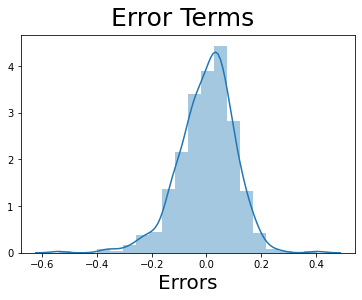

In [112]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 25)    # Plot heading                
plt.xlabel('Errors', fontsize = 20);          # X-label

## Making Predictions

# Applying the scaling on the test sets

In [115]:
num_col = ['temp','hum','windspeed','cnt']
day_test[num_col] = scaler.transform(day_test[num_col])

In [116]:
day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Sn_spring,Sn_summer,Sn_winter,...,oct,sept,mon,sat,sun,thurs,tue,wed,light_snow_rain,mist_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X_test and y_test

In [118]:
y_test = day_test.pop('cnt')
X_test = day_test

In [119]:
X_train_sm7 = X_train_sm7.drop(['const'], axis=1)

## Using model 7 to make predection 

In [120]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_sm7.columns]

In [121]:
 #Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [122]:
X_test_new.head()

,const,yr,holiday,workingday,windspeed,Sn_spring,Sn_summer,dec,jan,nov,sept,light_snow_rain,mist_cloudy
184,1.0,0,1,0,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0,0,0.334206,0,0,0,0,0,0,0,1
221,1.0,0,0,1,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.537414,0,1,0,0,0,0,0,0


In [124]:
# Making predictions
y_test_pred = lm7_model.predict(X_test_new)

In [125]:
y_test_pred.head()

184    0.392832
535    0.757003
299    0.448864
221    0.512414
152    0.462283
dtype: float64

# Model Evaluation

In [127]:
r2_score(y_true= y_test ,y_pred=y_test_pred)

0.7815728747560144

Text(0, 0.5, 'y_test_pred')

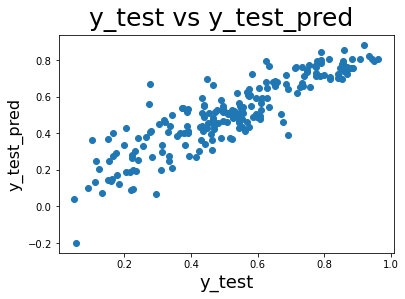

In [129]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=25)   # for heading       
plt.xlabel('y_test', fontsize=18)                   # X-label
plt.ylabel('y_test_pred', fontsize=16)              # Y- label

# Conclusion

- R2 score of train data set is 0.792
- R2 score of test data set is 0.781(There is a very small difference  between the train and test data set)
- Therefore we can say that the model is acceptable

-  As the coefficient of ‘Light_Snow_Rain’ is high and it is negative, small change in ‘Light_Snow_Rain’ feature will inversely affect the demand for bikes.

-  As the coefficient of ‘Year’ is also high and  is positive, the change in Year feature will directly affect the demand for bikes.

- Sn_Spring has negative effect with high coefficient.